In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import time
import tqdm.notebook as tqdm

from pathlib import Path

%matplotlib inline


import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, Input, MaxPool2D

In [3]:
CENTERED_IMAGE_PATH = "../data/bengali_centered"
PREPROCESSED_TRIAN_DATA_CSV_NAME = "new_train_data.csv"

In [4]:
preprocessed_train_df = pd.read_csv(os.path.join(CENTERED_IMAGE_PATH, PREPROCESSED_TRIAN_DATA_CSV_NAME))

In [7]:
preprocessed_train_df.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme,preprocessed_image_path
0,Train_0,15,9,5,ক্ট্রো,../data/bengali_centered/dataset_1/Train_0.jpg
1,Train_1,159,0,0,হ,../data/bengali_centered/dataset_1/Train_1.jpg
2,Train_2,22,3,5,খ্রী,../data/bengali_centered/dataset_1/Train_2.jpg
3,Train_3,53,2,2,র্টি,../data/bengali_centered/dataset_1/Train_3.jpg
4,Train_4,71,9,5,থ্রো,../data/bengali_centered/dataset_1/Train_4.jpg


In [8]:
preprocessed_train_df['grapheme_root'].head()

0     15
1    159
2     22
3     53
4     71
Name: grapheme_root, dtype: int64

In [10]:
preprocessed_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200840 entries, 0 to 200839
Data columns (total 6 columns):
image_id                   200840 non-null object
grapheme_root              200840 non-null int64
vowel_diacritic            200840 non-null int64
consonant_diacritic        200840 non-null int64
grapheme                   200840 non-null object
preprocessed_image_path    200840 non-null object
dtypes: int64(3), object(3)
memory usage: 9.2+ MB


In [12]:
ROOT_CLASSES_NUM = 168
VOWEL_CLASSES_NUM = 11
CONSONANT_CLASSES_NUM = 7

In [15]:
preprocessed_train_df['grapheme_root'].value_counts()

72     5736
64     5596
13     5420
107    5321
23     5149
       ... 
130     144
158     143
102     141
33      136
73      130
Name: grapheme_root, Length: 168, dtype: int64

In [16]:
preprocessed_train_df['vowel_diacritic'].value_counts()

0     41508
1     36886
7     28723
2     25967
4     18848
3     16152
9     16032
5      5297
6      4336
10     3563
8      3528
Name: vowel_diacritic, dtype: int64

In [17]:
preprocessed_train_df['consonant_diacritic'].value_counts()

0    125278
2     23465
5     21397
4     21270
1      7424
6      1387
3       619
Name: consonant_diacritic, dtype: int64

In [18]:
preprocessed_train_df['combined_word'] = preprocessed_train_df['grapheme_root'] * 1000 + preprocessed_train_df['vowel_diacritic'] * 10 + preprocessed_train_df['consonant_diacritic'] 

In [19]:
preprocessed_train_df.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme,preprocessed_image_path,combined_word
0,Train_0,15,9,5,ক্ট্রো,../data/bengali_centered/dataset_1/Train_0.jpg,15095
1,Train_1,159,0,0,হ,../data/bengali_centered/dataset_1/Train_1.jpg,159000
2,Train_2,22,3,5,খ্রী,../data/bengali_centered/dataset_1/Train_2.jpg,22035
3,Train_3,53,2,2,র্টি,../data/bengali_centered/dataset_1/Train_3.jpg,53022
4,Train_4,71,9,5,থ্রো,../data/bengali_centered/dataset_1/Train_4.jpg,71095


In [41]:
preprocessed_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200840 entries, 0 to 200839
Data columns (total 7 columns):
image_id                   200840 non-null object
grapheme_root              200840 non-null int64
vowel_diacritic            200840 non-null int64
consonant_diacritic        200840 non-null int64
grapheme                   200840 non-null object
preprocessed_image_path    200840 non-null object
combined_word              200840 non-null int64
dtypes: int64(4), object(3)
memory usage: 10.7+ MB


In [47]:
combined_word_counts = preprocessed_train_df['combined_word'].value_counts()

In [55]:
combined_word_counts

64072     303
72002     297
64032     289
167070    283
29000     178
         ... 
55030     129
141014    128
32090     128
116030    126
19000     118
Name: combined_word, Length: 1292, dtype: int64

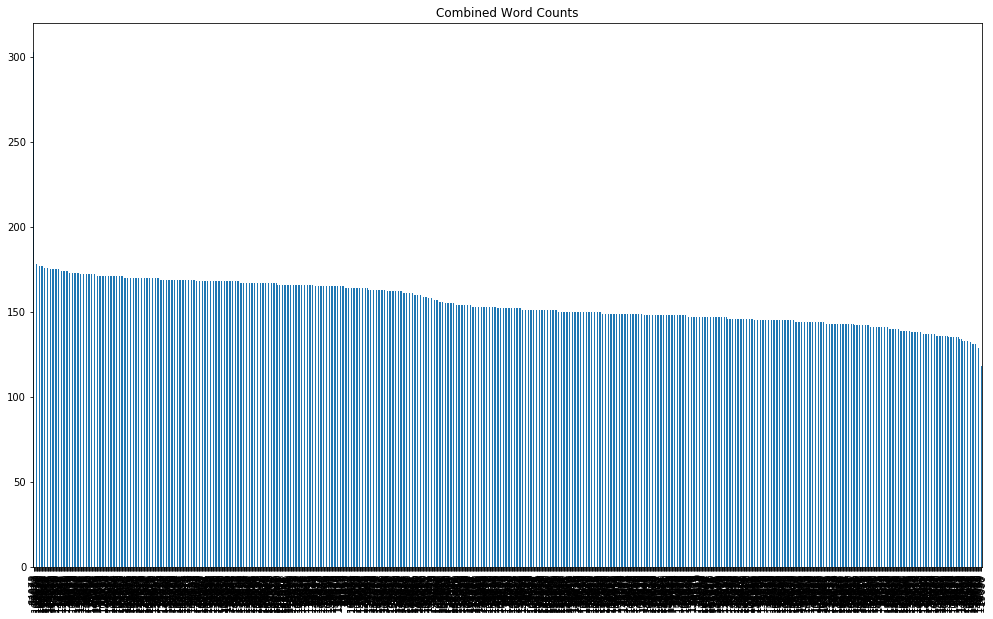

In [56]:
plt.figure(figsize=(17,10))
combined_word_counts.plot(kind='bar')
plt.title("Combined Word Counts")
plt.ylim(0, 320)
plt.show()

In [58]:
# preprocessed_train_df.to_csv("../data/bengali_centered/new_train_data_with_new_label.csv", mode='w')